In [7]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import time  
# import the Python Imag processing Library
from PIL import Image

# 1. Read an image

In [8]:
c= cv2.imread('RU.jpg')

In [10]:
c.shape

AttributeError: 'NoneType' object has no attribute 'shape'

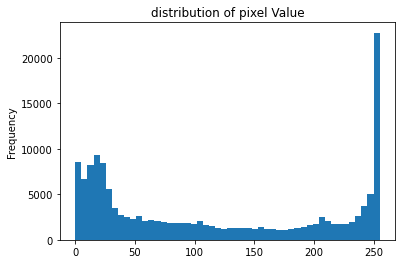

In [4]:
pd.Series(c.flatten()).plot(kind='hist',bins= 50, title= 'distribution of pixel Value')
plt.show()

# 2. Convert an Image to gray in openCV 

In [5]:
begin_time= time.time()
img_gry =cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
end_time= time.time()
img_gry.shape

(183, 275)

excution time is  0.0005898475646972656


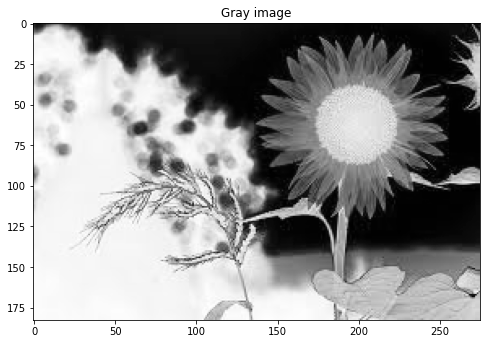

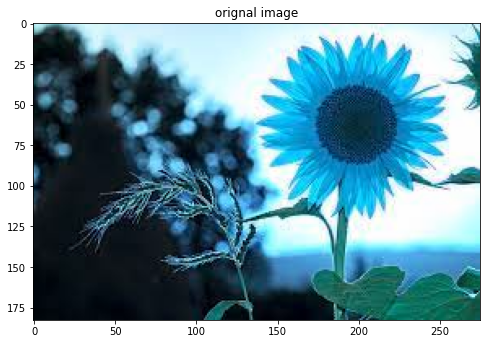

In [6]:
print("excution time is ", end_time - begin_time)
fig, ax=plt.subplots(figsize=(8,8))
a= ax.imshow(img_gry,cmap='Greys')
ax.set_title("Gray image")
plt.show()

fig, axs =plt.subplots(figsize= (8, 8)) 
axs.imshow(c)
axs.set_title("orignal image")
plt.show()


#  2.b. save a gray image

In [7]:
plt.imsave('c.jpg', img_gry)
cv2.imwrite('c.jpg', img_gry)

True

# 3. Convert an image to grayscale by using matrix operation

excution time is  0.0019953250885009766
Excution time to convert an image to gray scale by openCV is faster than using matrix operation


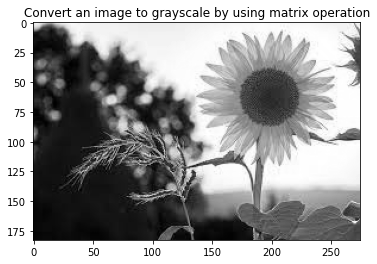

In [8]:
grayimage= np.zeros(c.shape[:2],dtype =float)
b= c[:,:,0]
g= c[:,:,1]
r=c[:,:,2]
begin_time= time.time()
grayimage= 0.2989 * r + 0.5870 * g + 0.1140 *b
end_time= time.time()
print("excution time is ", end_time - begin_time)
plt.imshow(grayimage, cmap='gray')
plt.title("Convert an image to grayscale by using matrix operation")
print("Excution time to convert an image to gray scale by openCV is faster than using matrix operation")



# 4. Convert an image to grayscale by a double loop

# First try:

In [9]:
from matplotlib.image import imread
moimg = imread('RU.jpg')
print(type(moimg))

<class 'numpy.ndarray'>


In [10]:
moimg.size, moimg.shape, moimg.ndim

(150975, (183, 275, 3), 3)

excution time is  0.7430112361907959
excution time is so low


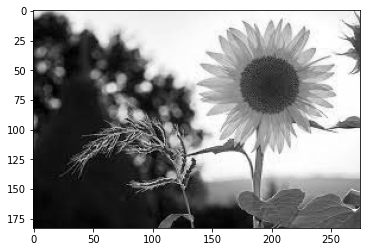

In [11]:
import PIL
import numpy as np
def main():
    begin_time= time.time()
    image_array= np.array(PIL.Image.open('RU.jpg'))
    for i in range(len(image_array)):
        for j in range(len(image_array[i])):
            b= image_array[i, j, 0]
            g= image_array[i, j, 1]
            r= image_array[i, j, 2]
            grayscale_value= b * 0.1140 + g * 0.5870 + r * 0.2989
            image_array[i,j, 1] =grayscale_value
    
    end_time= time.time()                     
    save_image = PIL.Image.fromarray(image_array)
    save_image.save('outputRU.jpg')
    print("excution time is ", end_time -begin_time)
    plt.imshow(grayimage, cmap='gray')


                          
main()

print("excution time is so low")

# Second try:

 Excution time is  1.3329098224639893


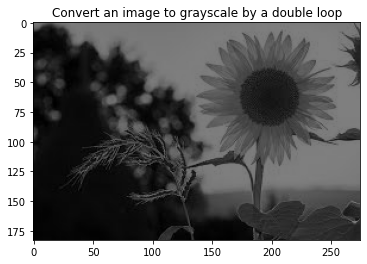

In [12]:
c= cv2.imread("RU.jpg")
begin_time =time.time()
outimg =np.ones((c.shape[0],c.shape[1],3),np.uint8)
for i in range(0,c.shape[0],1):
    for j in range(0,c.shape[1],1):
        outimg[i][j][0] =255-c[i][j][0]
        outimg[i][j][1] =255-c[i][j][1]
        outimg[i][j][2] =255-c[i][j][2]
imgeBW =cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
outBWimg =np.ones((c.shape[0],c.shape[1],3),np.uint8)
for i in range(0, imgeBW.shape[0],1):
    for j in range(0, imgeBW.shape[1],1):
        outBWimg[i][j] = imgeBW[i][j] * 0.5
end_time =time.time()
plt.imshow(outBWimg, cmap='gray')
plt.title("Convert an image to grayscale by a double loop")
print(" Excution time is ", end_time - begin_time)

# 5. Display the original image in CV2

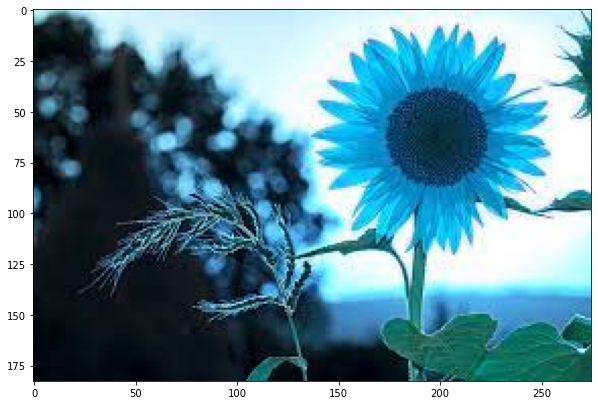

In [13]:
fig, axs =plt.subplots(figsize= (10, 10)) 
axs.imshow(c)
plt.show()

# 5.b Display image by 3 channel in CV2

Text(0.5, 1.0, 'Blue Channel')

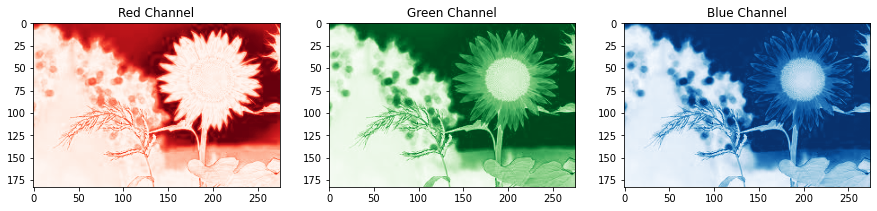

In [14]:
fig , axs =plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(c[:,:,0], cmap='Reds')
axs[1].imshow(c[:,:,1], cmap='Greens')
axs[2].imshow(c[:,:,2], cmap='Blues')
axs[0].set_title("Red Channel")
axs[1].set_title("Green Channel")
axs[2].set_title("Blue Channel")

# 6. Rotated an Image

# First try:

In [33]:
# rotated image by angle
imgr = cv2.rotate(c, rotateCode= 0)

# image center/shape
h,w,c = imgr.shape
center =(h//2, w//2)
begin_time= time.time()
rotation_matrix = cv2.getRotationMatrix2D(center,90, 1.0)
final_rotated_image =cv2.warpAffine(c,rotation_matrix,(w,h))
end_time= time.time()

In [ ]:
cv2.imshow("rotated",imgr)
cv2.imshow("finall",final_rotated_image)
print("Excution time is ", end_time - begin_time)
cv2.waitKey(0)
cv2.destoryAllWindows()

Excution time is  0.002805948257446289


# Second Try:

In [ ]:
c= cv2.imread('RU.jpg')
angle = 80*np.pi/180
rows = c.shape[0]
cols = c.shape[1]
begin_time = time.time()
m = cv2.getRotationMatrix2D((cols//2, rows//2),angle,1)
dst = cv2.warpAffine(c,m,(cols,rows))
end_time= time.time()
print(" Excution time is ", end_time - begin_time)
cv2.imshow("final",dst)
cv2.waitKey(0)
cv2.destoryAllWindows()


# Third try:

In [6]:

def func_Rotate(deg=0):
    deg= cv2.getTrackbarPos('degree', 'Frame')
    rotationMatrix= cv2.getRotationMatrix2D((w/2,h/2), deg, 1)
    rotatedImage= cv2.warpAffine(originalImg, rotationMatrix, (w,h))
    cv2.imshow("Rotate", rotatedImage)
if __name__ == '__main__':
    
    originalImg= cv2.imread("RU.jpg",1)
    h,w =originalImg.shape[:2]
    cv2.namedWindow('Frame')
    deg=0
    cv2.createTrackbar('degree','Frame',deg, 360, func_Rotate)
    func_Rotate(0)
    cv2.imshow('Frame',originalImg)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

# 8. Rotation an image without using cv2getRotationMAtrix2D

In [ ]:
# import the Python Imag processing Library
from PIL import Image

# Giving The Original image Directory
# Specified
OriginalImage = Image.open("RU.jpg")

# Rotate Image By 90 Degree
rimage1 = Original_Image.rotate(180)

# This is Alternative Syntax To Rotate
# The Image
rimage2 = Original_Image.transpose(Image.ROTATE_90)

# This Will Rotate Image By 60 Degree
rimage3 = Original_Image.rotate(60)


rimage1.show()
rimage2.show()
rimage3.show()
